In [1]:
from comrad_patch import Application, Page, TextInput, Paragraph, NumberInput, Button, Chart
import matplotlib.pyplot as plt


In [2]:
# chart example with global var and import in the previous cell
T = 3
def children_in_care(entered_care, in_care, left_care):
    #creates chart that will be used for the app
    fig, ax = plt.subplots()

    labels = [
        "Number of children who entered care",
        "Number of children in care",
        "Number of children who left care",
    ]
    counts = [entered_care*T, in_care, left_care]

    ax.bar(labels, counts)

    ax.set_ylabel("Number of children")
    ax.set_title("Children in, entering and leaving care by year")







    return fig




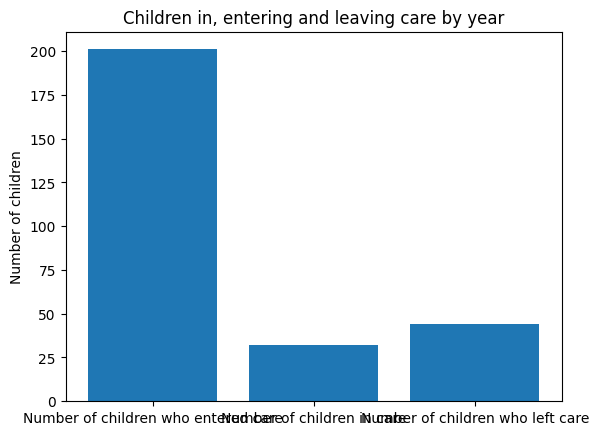

In [3]:
# plot example 
fig = children_in_care(entered_care=67, in_care=32, left_care=44)

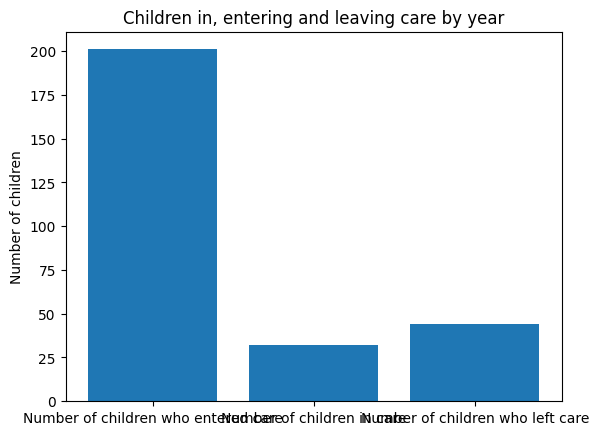

In [4]:
# code <-> converter example
from comrad_patch.util.code import text_to_code, code_to_text
from pyodide_dill import dill


func_in_string = code_to_text(children_in_care)

func = text_to_code(func_in_string)

fig = func(entered_care=67, in_care=32, left_care=44)



In [5]:
# app example

app = Application()


greeting_page = Page(
    name="index",
    controller={"next": "input_page"},
    components=[TextInput(name="name", required=True)],
)
input_page = Page(
    name="input_page",
    components=[
        Paragraph("Please set the number of children entering, in and who left care"),
        NumberInput("entered_care", "Number of children who entered care"),
        NumberInput("in_care", "Number of children in care"),
        NumberInput("left_care", "Number of children who left care"),
    ],
    controller={"next": "children_in_care"},
)

chart_page = Page(name="children_in_care", components=[Chart(generator=children_in_care)])


app.add_page(greeting_page)
app.add_page(input_page)
app.add_page(chart_page)


In [6]:
# export to yaml
print(app.yaml())

pages:
- name: index
  components:
  - type: TextInput
    required: true
    name: name
  controller:
    next: input_page
    previous: null
- name: input_page
  components:
  - type: Paragraph
    text: Please set the number of children entering, in and who left care
  - type: NumberInput
    required: false
    name: entered_care
    description: Number of children who entered care
  - type: NumberInput
    required: false
    name: in_care
    description: Number of children in care
  - type: NumberInput
    required: false
    name: left_care
    description: Number of children who left care
  controller:
    next: children_in_care
    previous: null
- name: children_in_care
  components:
  - type: Chart
    code: gASVzAMAAAAAAACMCmRpbGwuX2RpbGyUjBBfY3JlYXRlX2Z1bmN0aW9ulJOUKGgAjAxfY3JlYXRlX2NvZGWUk5QoQw4CAjgCCAUaAiwCKgEqCJRLA0sASwBLB0sESwND4JcAdAAAAAAAAAAAAAAAoAEAAAAAAAAAAAAAAAAAAAAAAAAAAKYAAACrAAAAAAAAAAAAXAIAAH0DfQRnAGQBogF9BXwAdAQAAAAAAAAAAAAAegUAAHwBfAJnA30GfASgAwAAAAAAAAAAAA

In [7]:
# export to json
print(app.json())

{
    "pages": [
        {
            "name": "index",
            "components": [
                {
                    "type": "TextInput",
                    "required": true,
                    "name": "name"
                }
            ],
            "controller": {
                "next": "input_page",
                "previous": null
            }
        },
        {
            "name": "input_page",
            "components": [
                {
                    "type": "Paragraph",
                    "text": "Please set the number of children entering, in and who left care"
                },
                {
                    "type": "NumberInput",
                    "required": false,
                    "name": "entered_care",
                    "description": "Number of children who entered care"
                },
                {
                    "type": "NumberInput",
                    "required": false,
                    "name": "in_care",
       

In [8]:
# dump json data
from comrad_patch.util.files import dump_data
dump_data(data=app.json(),file_path="app.json")


In [9]:
# setup comrad app from json file


from comrad_patch.builder import builder

comrad_app_from_json = builder("app.json")
print(comrad_app_from_json)



In [10]:
# dump yaml data
from comrad_patch.util.files import dump_data
dump_data(data=app.yaml(),file_path="app.yaml")

In [11]:
# setup comrad app from yaml file


from comrad_patch.builder import builder

comrad_app_from_yaml = builder("app.yaml")
print(comrad_app_from_yaml)
